In [92]:
import pandas as pd
import altair as alt
titanic_deck_df = pd.read_csv("../data/wrangled_titanic_df.csv").fillna("None")
titanic_deck_df.head()

,cabin,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_x,cabin_y,deck
0,A10,"Ross, Mr. John Hugo",1,Passenger Died,male,36.0,0,0,13049,40.1250,C,None,None,"Winnipeg, MB",425.0,5.0,A
1,A11,"Rosenbaum, Miss. Edith Louise",1,Passenger Survived,female,33.0,0,0,PC 17613,27.7208,C,11,None,"Paris, France",425.0,1.0,A
2,A14,"Clifford, Mr. George Quincy",1,Passenger Died,male,None,0,0,110465,52.0000,S,None,None,"Stoughton, MA",420.0,5.0,A
3,A16,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,Passenger Survived,female,48.0,1,0,11755,39.6000,C,1,None,London / Paris,420.0,6.0,A
4,A18,"Dulles, Mr. William Crothers",1,Passenger Died,male,39.0,0,0,PC 17580,29.7000,C,None,133.0,"Philadelphia, PA",415.0,5.0,A


In [93]:
titanic_deck_df['survived'] = titanic_deck_df['survived'].map({'Passenger Survived':1, 'Passenger Died':0})
titanic_deck_df.head()

,cabin,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_x,cabin_y,deck
0,A10,"Ross, Mr. John Hugo",1,0,male,36.0,0,0,13049,40.1250,C,None,None,"Winnipeg, MB",425.0,5.0,A
1,A11,"Rosenbaum, Miss. Edith Louise",1,1,female,33.0,0,0,PC 17613,27.7208,C,11,None,"Paris, France",425.0,1.0,A
2,A14,"Clifford, Mr. George Quincy",1,0,male,None,0,0,110465,52.0000,S,None,None,"Stoughton, MA",420.0,5.0,A
3,A16,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,1,female,48.0,1,0,11755,39.6000,C,1,None,London / Paris,420.0,6.0,A
4,A18,"Dulles, Mr. William Crothers",1,0,male,39.0,0,0,PC 17580,29.7000,C,None,133.0,"Philadelphia, PA",415.0,5.0,A


In [94]:
def make_deck_plot():
    titanic_deck_df = pd.read_csv("../data/wrangled_titanic_df.csv").fillna("None")
    titanic_deck_df['survived'] = titanic_deck_df['survived'].map({'Passenger Survived':1, 'Passenger Died':0})
    titanic_deck_df = titanic_deck_df.groupby('deck').mean()*100
    titanic_deck_df = titanic_deck_df.reset_index()
    chart = alt.Chart(titanic_deck_df).mark_bar(size = 10, color = "red").encode(
            alt.X('survived:Q', title = "Rate of Survival"),
            alt.Y("deck:O", title = "Deck")
        ).properties(title = "Survival Rate by Deck", width = 500, height=50)
    return chart


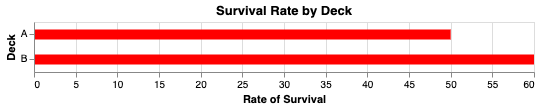

In [95]:
make_deck_plot()